In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from tensor_simulation import tensor_simulation as tsim
from optimize import AdamOptimization as opt_

In [2]:
ind = np.zeros((3, 30, 30), dtype=np.float32)
ind[-1, -1, :5] = (1, 0, 100, 20, .2)
ind[1, :, :2] = .9
ind[-1, 0, :3] = (.6, .1, .9)
params = {"species_1": torch.nn.Parameter(torch.tensor([.6, .1, .9])), "compartment_1": torch.nn.Parameter(torch.tensor(ind[1]))}

In [3]:
torch_sim = tsim(individual=torch.from_numpy(ind), parameters=params,
                 num_species=1, num_pairs=0, stop=20, time_step=0.2,
                 max_epoch=100, compartment=0, device="cpu")

<Axes: >

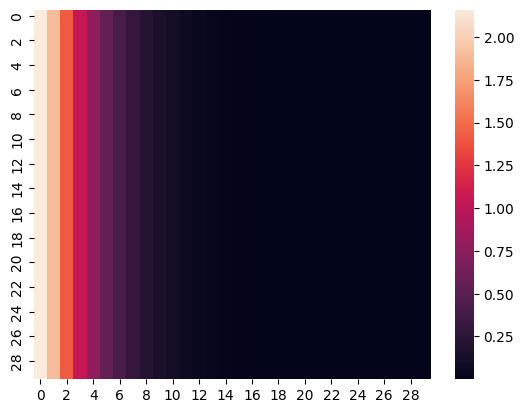

In [4]:
sns.heatmap(torch_sim.detach().numpy())

In [5]:
tt = torch.zeros((1, 30, 30))
tt[0, :, :] = torch_sim.detach() 

In [6]:
obj = opt_(
    target=tt,
    path="",
    file_name="torch_test.h5",
    epochs=5,
    learning_rate=None,
    param_opt=True,
    compartment_opt=True,
    cost_alpha=0.6,
    cost_beta=0.4,
    max_val=1.0,
    trainable_compartment=1,
    device="cpu")    

In [7]:
inds = np.zeros((3, 30, 30), dtype=np.float32)
inds[-1, -1, :5] = (1, 0, 100, 20, .2)
inds[1, :, :] = np.random.rand(30, 30) 
inds[-1, 0, :3] = np.random.rand(3)

In [8]:
ind_, cost_, = obj.gradient_optimization(individual=torch.from_numpy(inds))

C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(individual[-1, i, 0:3], dtype=torch.float32),
C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:168: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(individual[k, :, :], dtype=torch.float32),


Epoch 1/5, Optimizer 1, Cost: 3.3593661785125732


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [30, 30]], which is output 0 of AsStridedBackward0, is at version 9091; expected version 9090 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).